In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')

In [28]:
df['grid'] = df['infill_pattern'].replace(['grid','honeycomb'], ['1','0']).astype(int)
df['honeycomb'] = df['infill_pattern'].replace(['grid','honeycomb'], ['0','1']).astype(int)
junk = df.pop('infill_pattern')

df['pla'] = df['material'].replace(['pla','abs'], ['0','1']).astype(int)
df['abs'] = df['material'].replace(['pla','abs'], ['1','0']).astype(int)
junk = df.pop('material')
junk = df.pop('bed_temperature (0C)')

In [29]:
cols = ['layer_height (mm)', 'wall_thickness (mm)', 'infill_density (%)',
        'nozzle_temperature (0C)',
       'print_speed (mm/s)', 'pla','abs','grid','honeycomb', 'fan_speed (%)']

In [30]:
cov = df.cov()

In [31]:
cov = df.cov()
for col in cols:
    cov.pop(col)
cov.sort_values(by=['roughness (μm)'])

,roughness (μm),tension_strength (MPa),elongation (%)
wall_thickness (mm),-65.701633,10.431020,0.406286
abs,-11.663265,1.306122,0.157143
honeycomb,-3.418367,0.040816,0.018367
grid,3.418367,-0.040816,-0.018367
layer_height (mm),5.110531,0.194408,0.025763
elongation (%),7.724735,5.896163,0.621241
pla,11.663265,-1.306122,-0.157143
tension_strength (MPa),45.626122,79.666939,5.896163
infill_density (%),297.375510,81.151020,3.178776
print_speed (mm/s),356.000000,-70.122449,-5.477551


# Correlation with Targets

In [32]:
corr = df.corr(method='pearson')
for col in cols:
    corr.pop(col)

In [33]:
corr

,roughness (μm),tension_strength (MPa),elongation (%)
layer_height (mm),0.801341,0.338230,0.507583
wall_thickness (mm),-0.226987,0.399849,0.176364
infill_density (%),0.118389,0.358464,0.159009
nozzle_temperature (0C),0.348611,-0.405908,-0.527447
print_speed (mm/s),0.121066,-0.264590,-0.234052
fan_speed (%),0.192142,-0.252883,-0.300871
roughness (μm),1.000000,0.051617,0.098962
tension_strength (MPa),0.051617,1.000000,0.838109
elongation (%),0.098962,0.838109,1.000000
grid,0.068340,-0.009054,-0.046138


In [34]:
corr['roughness (μm)'].abs().sort_values()

tension_strength (MPa)     0.051617
honeycomb                  0.068340
grid                       0.068340
elongation (%)             0.098962
infill_density (%)         0.118389
print_speed (mm/s)         0.121066
fan_speed (%)              0.192142
wall_thickness (mm)        0.226987
pla                        0.233173
abs                        0.233173
nozzle_temperature (0C)    0.348611
layer_height (mm)          0.801341
roughness (μm)             1.000000
Name: roughness (μm), dtype: float64

In [35]:
corr['tension_strength (MPa)'].abs().sort_values()

grid                       0.009054
honeycomb                  0.009054
roughness (μm)             0.051617
fan_speed (%)              0.252883
print_speed (mm/s)         0.264590
pla                        0.289726
abs                        0.289726
layer_height (mm)          0.338230
infill_density (%)         0.358464
wall_thickness (mm)        0.399849
nozzle_temperature (0C)    0.405908
elongation (%)             0.838109
tension_strength (MPa)     1.000000
Name: tension_strength (MPa), dtype: float64

In [36]:
corr['elongation (%)'].abs().sort_values()

grid                       0.046138
honeycomb                  0.046138
roughness (μm)             0.098962
infill_density (%)         0.159009
wall_thickness (mm)        0.176364
print_speed (mm/s)         0.234052
fan_speed (%)              0.300871
pla                        0.394737
abs                        0.394737
layer_height (mm)          0.507583
nozzle_temperature (0C)    0.527447
tension_strength (MPa)     0.838109
elongation (%)             1.000000
Name: elongation (%), dtype: float64

# Categorical Corr

In [37]:
from scipy.stats import pointbiserialr

In [38]:
# get data
data = df

# get continuous and dichotomous data
grades = data['roughness (μm)']
question_1 = data['honeycomb']

# pbc of first question
pbc = pointbiserialr(question_1, grades)
print(pbc)

PointbiserialrResult(correlation=-0.06834029938091876, pvalue=0.6372349047085676)


In [39]:
# get data
data = df

# get continuous and dichotomous data
grades = data['elongation (%)']
question_1 = data['honeycomb']

# pbc of first question
pbc = pointbiserialr(question_1, grades)
print(pbc)

PointbiserialrResult(correlation=0.04613807514837846, pvalue=0.7503610944942998)


In [40]:
# get data
data = df

# get continuous and dichotomous data
grades = data['tension_strength (MPa)']
question_1 = data['honeycomb']

# pbc of first question
pbc = pointbiserialr(question_1, grades)
print(pbc)

PointbiserialrResult(correlation=0.009053945675203266, pvalue=0.9502418872501852)


# Logistic Regression

# PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [42]:
x = df.copy(deep=False)
y1 = x.pop('roughness (μm)')
y2 = x.pop('tension_strength (MPa)')
y3 = x.pop('elongation (%)')

In [43]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#                         ,columns = ['principal component 1', 'principal component 2'])

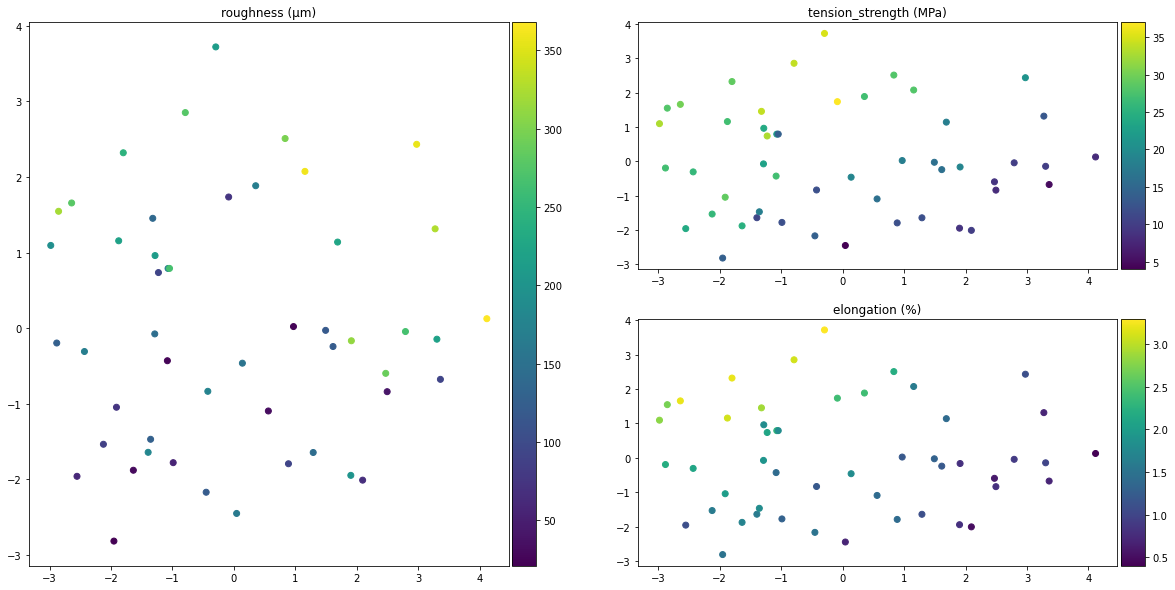

In [44]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(df)


fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
im1 = ax1.scatter(Xt[:, 0], Xt[:, 1], c=y1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(222)
im2 = ax2.scatter(Xt[:, 0], Xt[:, 1], c=y2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(224)
im2 = ax3.scatter(Xt[:, 0], Xt[:, 1], c=y3)
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
ax1.set_title('roughness (μm)')
ax2.set_title('tension_strength (MPa)')
ax3.set_title('elongation (%)')

plt.show()

# Test Datapoints Choice

In [45]:
df =df.sort_values('roughness (μm)').reset_index()

In [63]:
from sklearn.model_selection import train_test_split as ttsp
xtrain, xtest, ytrain, ytest = ttsp(x, y1, test_size=0.2, random_state=32)
xtrain2, xtest2, ytrain2, ytest2 = ttsp(x, y1, test_size=0.2, random_state=0)

Text(0, 0.5, 'Rough')

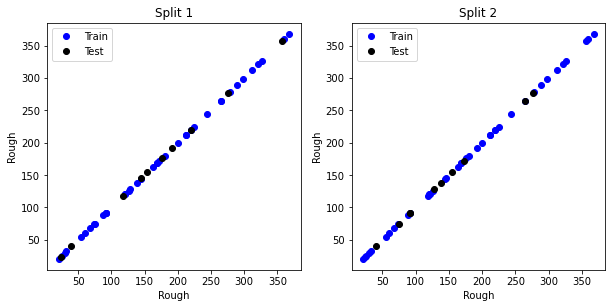

In [64]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.plot(ytrain,ytrain,'bo',label="Train")
ax1.plot(ytest,ytest,'ko',label = 'Test')
ax1.legend()
ax1.set_title('Split 1')
ax1.set_xlabel('Rough')
ax1.set_ylabel('Rough')

ax2 = fig.add_subplot(222)
ax2.plot(ytrain2,ytrain2,'bo',label="Train")
ax2.plot(ytest2,ytest2,'ko',label = 'Test')
ax2.legend()
ax2.set_title('Split 2')
ax2.set_xlabel('Rough')
ax2.set_ylabel('Rough')

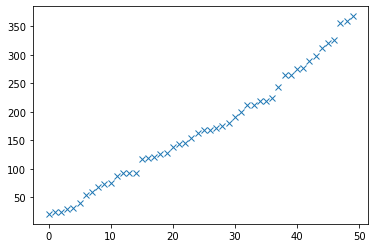

In [ ]:
plt.plot(df['roughness (μm)'],'x')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,n_init=10,random_state=10)
df['label'] = kmeans.fit_predict(df[['roughness (μm)']])
# df['label'] = kmeans.fit_predict(df)
ord_idx=np.argsort(kmeans.cluster_centers_.flatten())

cntrs = np.zeros_like(df['label'])-1
for i in np.arange(8):
    cntrs[df['label']==ord_idx[i]]=i
df['label'] = cntrs

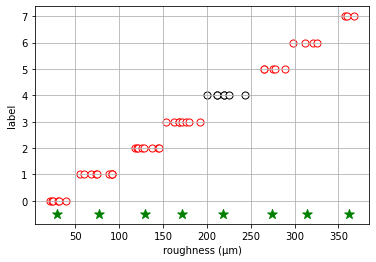

In [ ]:
ax = df[df['label']==4].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', edgecolor='black')
df[df['label']==1].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', ax=ax, edgecolor='red')
df[df['label']==2].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', ax=ax, edgecolor='red')
df[df['label']==3].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', ax=ax, edgecolor='red')
df[df['label']==5].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', ax=ax, edgecolor='red')
df[df['label']==6].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', ax=ax, edgecolor='red')
df[df['label']==7].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', ax=ax, edgecolor='red')
df[df['label']==0].plot.scatter(x='roughness (μm)', y='label', s=50, color='white', ax=ax, edgecolor='red')

plt.scatter(kmeans.cluster_centers_.ravel(), [-0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*')
plt.grid()

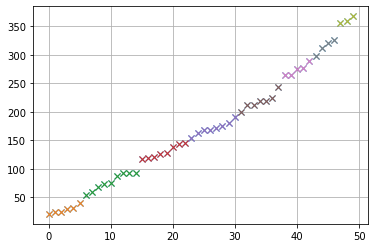

In [ ]:
plt.plot(df['roughness (μm)'],'x')
plt.plot(df[df['label']==0]['roughness (μm)'],'x')
plt.plot(df[df['label']==1]['roughness (μm)'],'x')
plt.plot(df[df['label']==2]['roughness (μm)'],'x')
plt.plot(df[df['label']==3]['roughness (μm)'],'x')
plt.plot(df[df['label']==4]['roughness (μm)'],'x')
plt.plot(df[df['label']==5]['roughness (μm)'],'x')
plt.plot(df[df['label']==6]['roughness (μm)'],'x')
plt.plot(df[df['label']==7]['roughness (μm)'],'x')
plt.grid()